In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. LOAD DATA
df = pd.read_excel('/content/drive/MyDrive/Titik_Koordinat_Dengan_Slope (1).xlsx')

In [ ]:
# 3. info data
print("Jumlah data:", df.shape)
print("\nContoh data:")
print(df.head())
print("\nCek jumlah nilai kosong per kolom:")
print(df.isnull().sum())


Univariate Analysis:

Summary statistics for numerical features:
         longitude     latitude        slope
count  3005.000000  3005.000000  3005.000000
mean    122.527341    -3.972981    46.030655
std       0.051125     0.022656    65.131577
min     122.443809    -4.027988    -4.318678
25%     122.484540    -3.985851     2.175143
50%     122.517513    -3.971376    20.627602
75%     122.581054    -3.962311    60.101204
max     122.624313    -3.903261   380.036000

Value counts for categorical features:

Value counts for 'kecamatan':
kecamatan
Puuwatu          706
Kendari          683
Kendari Barat    651
Kadia            617
Mandonga         348
Name: count, dtype: int64

Value counts for 'geology':
geology
Gamping keras, Marmer (sangat curam, hindari pembangunan)    1081
Eluvium, Lumpur (datar, berpotensi genangan)                  733
Lanau, Gamping, Pasir (stabil, cocok untuk permukiman)        641
Sabak, Napal (rawan longsor, perlu konservasi)                353
Serpih, Kuarsit 

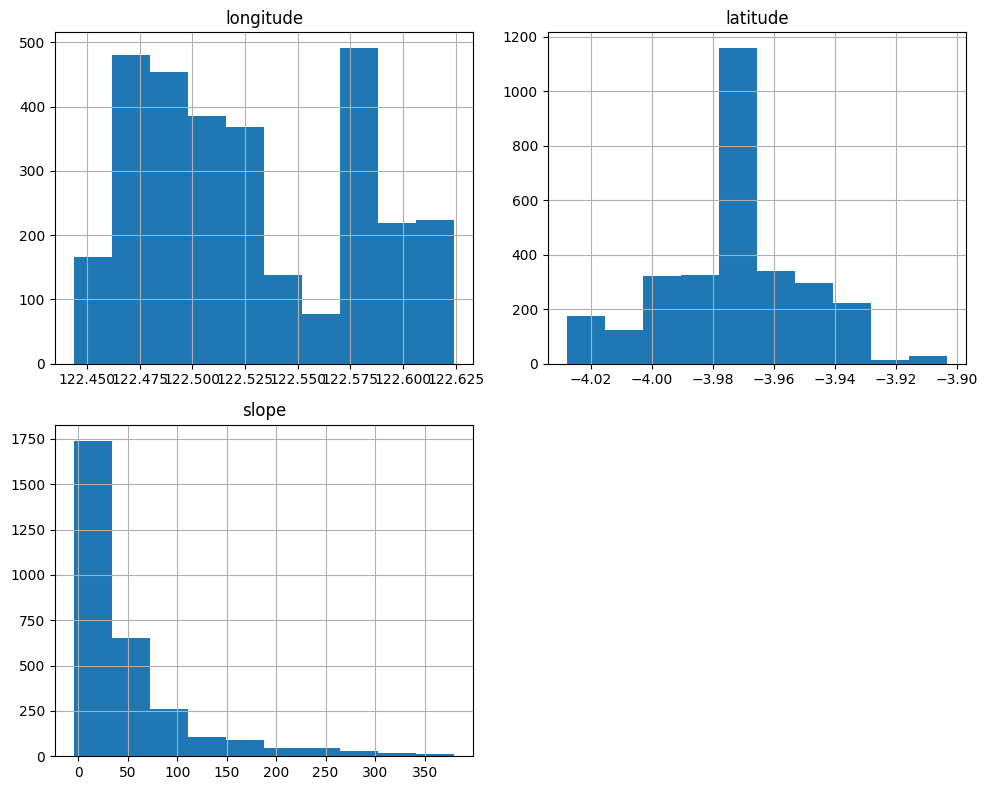


Visualizing distributions of categorical features:


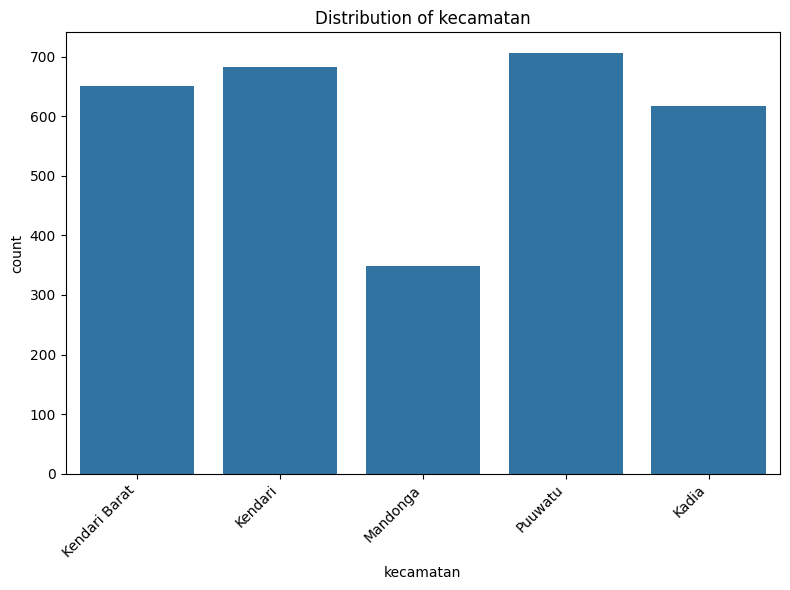

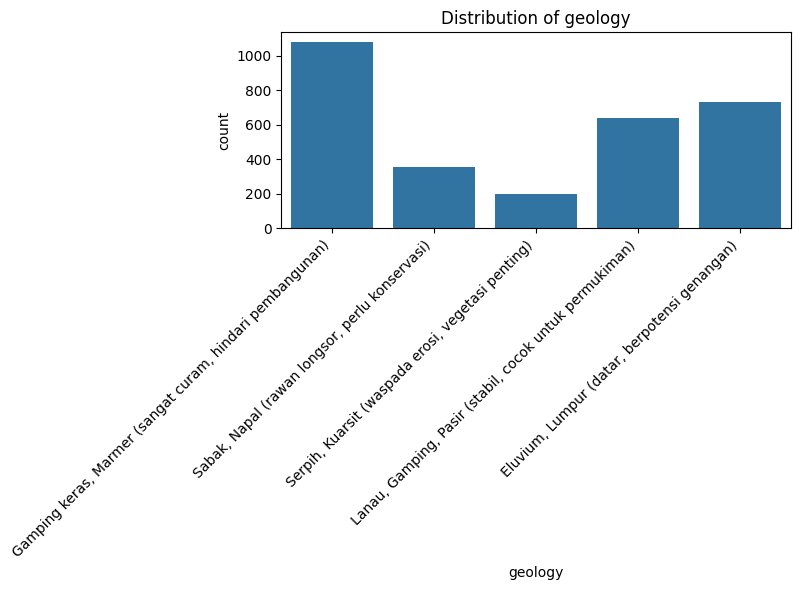

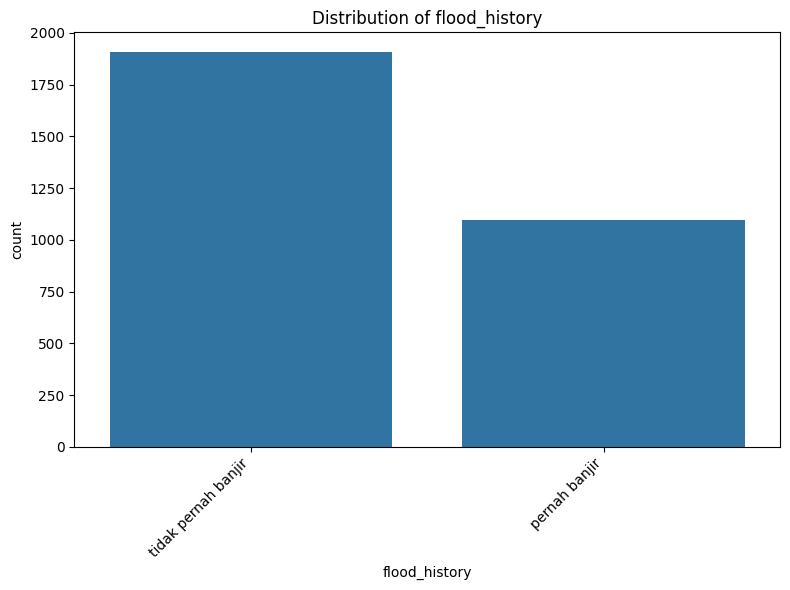

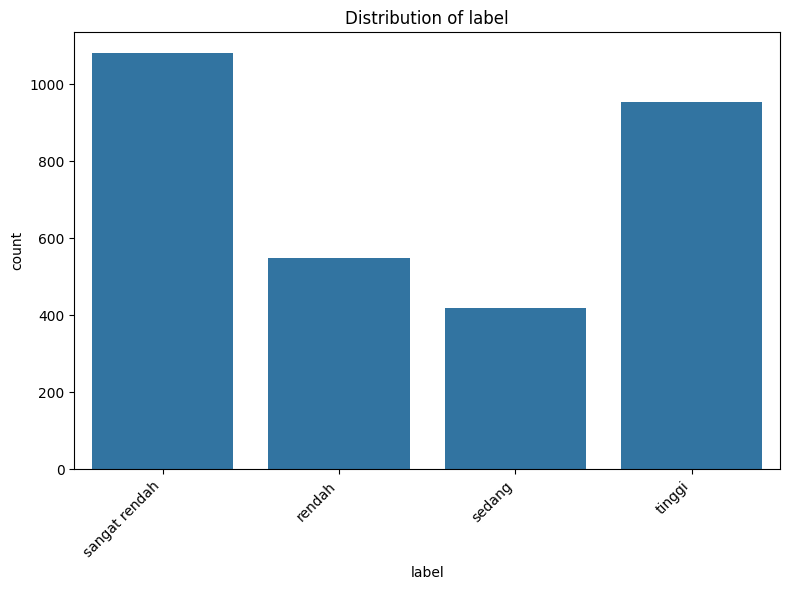

In [ ]:
# 4. EDA
# Univariate Analysis
print("\nUnivariate Analysis:")

# Summarize numerical features
print("\nSummary statistics for numerical features:")
print(df.describe())

# Summarize categorical features
print("\nValue counts for categorical features:")
for col in df.select_dtypes(include='object').columns:
  print(f"\nValue counts for '{col}':")
  print(df[col].value_counts())

# Visualize distributions of numerical features
print("\nVisualizing distributions of numerical features:")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Visualize distributions of categorical features
print("\nVisualizing distributions of categorical features:")
for col in df.select_dtypes(include='object').columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(data=df, x=col)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()


Bivariate Analysis:

Correlation matrix for numerical features:


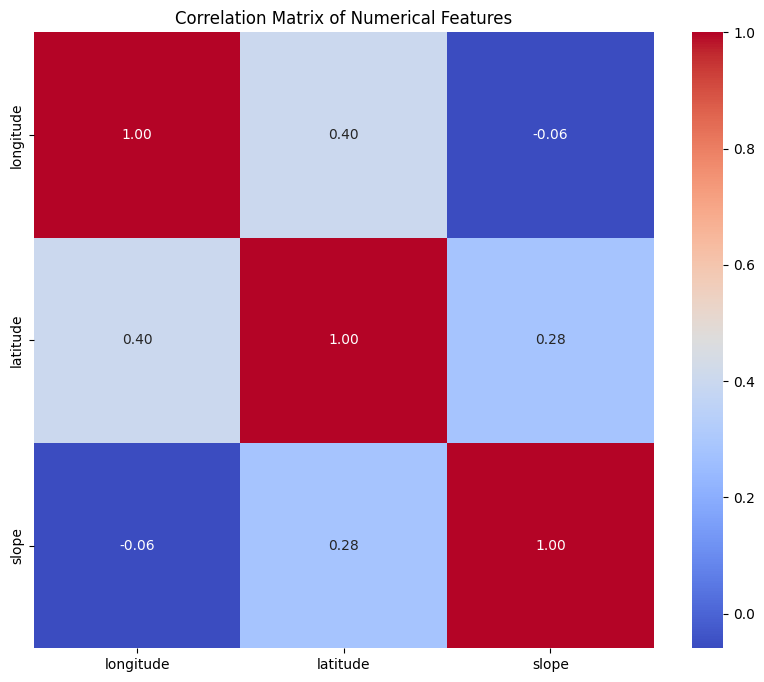

In [ ]:
# Bivariate Analysis
print("\nBivariate Analysis:")

# Correlation matrix for numerical features
print("\nCorrelation matrix for numerical features:")
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Visualize relationships between numerical features and the target variable (assuming 'Slope' is the target)
# Replace 'Slope' with your actual target variable name if it's different
if 'Slope' in numerical_cols:
    print("\nVisualizing relationships between numerical features and 'Slope':")
    for col in numerical_cols:
        if col != 'Slope':
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=df, x=col, y='Slope')
            plt.title(f'Relationship between {col} and Slope')
            plt.show()
elif 'Slope' in df.select_dtypes(include='object').columns:
     print("\nVisualizing relationships between numerical features and 'Slope' (categorical):")
     for col in numerical_cols:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x='Slope', y=col)
            plt.title(f'Relationship between Slope and {col}')
            plt.show()


# Visualize relationships between categorical features and the target variable (assuming 'Slope' is the target)
# Replace 'Slope' with your actual target variable name if it's different
categorical_cols = df.select_dtypes(include='object').columns
if 'Slope' in categorical_cols:
    print("\nVisualizing relationships between categorical features and 'Slope':")
    for col in categorical_cols:
        if col != 'Slope':
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=col, hue='Slope')
            plt.title(f'Relationship between {col} and Slope')
            plt.xticks(rotation=45, ha='right')
            plt.show()
elif 'Slope' in numerical_cols:
    print("\nVisualizing relationships between categorical features and 'Slope' (numerical):")
    for col in categorical_cols:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x=col, y='Slope')
            plt.title(f'Relationship between {col} and Slope')
            plt.xticks(rotation=45, ha='right')
            plt.show()


Multivariate Analysis:

Pairplot for numerical features:


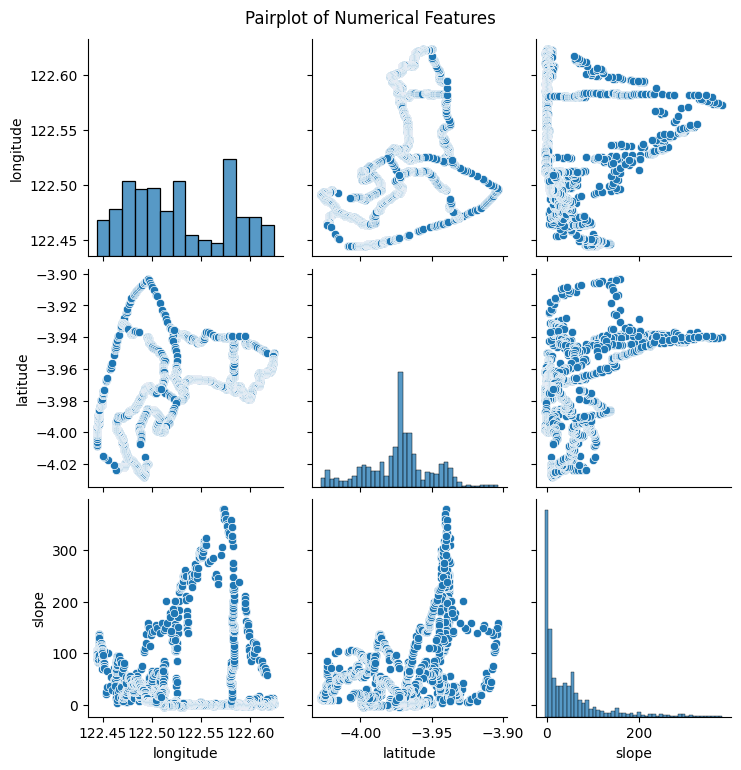


Visualizing relationships between numerical features, categorical features, and target:
Target variable 'Slope' not found in the DataFrame. Cannot visualize relationships with target.


In [ ]:
# Multivariate Analysis
print("\nMultivariate Analysis:")

# Pairplot for a subset of numerical features
print("\nPairplot for numerical features:")
# Selecting a subset of numerical features to avoid overcrowding the plot
subset_numerical_cols = numerical_cols[:5] # Adjust the number as needed
if len(subset_numerical_cols) > 1:
    sns.pairplot(df[subset_numerical_cols].dropna()) # dropna to handle potential missing values
    plt.suptitle('Pairplot of Numerical Features', y=1.02)
    plt.show()
else:
    print("Not enough numerical columns for pairplot.")

# Visualize relationships between multiple numerical and categorical features (using hue)
# Replace 'Slope' with your actual target variable name if it's different
print("\nVisualizing relationships between numerical features, categorical features, and target:")
if 'Slope' in df.columns:
    # Scatter plot with hue for a categorical variable
    if len(numerical_cols) > 1 and len(categorical_cols) > 0:
        plt.figure(figsize=(10, 8))
        # Choose two numerical columns and one categorical column
        num_col1 = numerical_cols[0]
        num_col2 = numerical_cols[1]
        cat_col = categorical_cols[0]
        sns.scatterplot(data=df, x=num_col1, y=num_col2, hue=cat_col)
        plt.title(f'Relationship between {num_col1}, {num_col2}, and {cat_col}')
        plt.show()
    else:
        print("Not enough numerical or categorical columns to create a scatter plot with hue.")

    # Boxplot comparing a numerical feature across combinations of two categorical features
    if len(numerical_cols) > 0 and len(categorical_cols) > 1:
        plt.figure(figsize=(12, 8))
        num_col = numerical_cols[0]
        cat_col1 = categorical_cols[0]
        cat_col2 = categorical_cols[1]
        sns.boxplot(data=df, x=cat_col1, y=num_col, hue=cat_col2)
        plt.title(f'Relationship between {num_col}, {cat_col1}, and {cat_col2}')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    else:
         print("Not enough numerical or categorical columns to create a box plot with two categorical variables.")

else:
    print("Target variable 'Slope' not found in the DataFrame. Cannot visualize relationships with target.")

In [ ]:
# 5. Pre-processing data
df['kecamatan'].unique()

array(['Kendari Barat', 'Kendari', 'Mandonga', 'Puuwatu', 'Kadia'],
      dtype=object)

In [ ]:
# Membuat mapping dari nama kecamatan ke angka
kecamatan_mapping = {
    "Kendari Barat": 1,
    "Kendari": 2,
    "Mandonga": 3,
    "Puuwatu": 4,
    "Kadia": 5
}

# Mengganti nilai di kolom 'kecamatan' dengan angka sesuai mapping
df['kecamatan'] = df['kecamatan'].map(kecamatan_mapping)

# Opsional: Cek hasil perubahan
print(df['kecamatan'].unique())
print(df.head())

[1 2 3 4 5]
   kecamatan   longitude  latitude      slope  \
0          1  122.523763 -3.936057  200.97249   
1          1  122.523383 -3.937018  189.21481   
2          1  122.523310 -3.937201  183.32143   
3          1  122.523238 -3.937599  174.69136   
4          1  122.523292 -3.938059  160.20390   

                                             geology        flood_history  \
0  Gamping keras, Marmer (sangat curam, hindari p...  tidak pernah banjir   
1  Gamping keras, Marmer (sangat curam, hindari p...  tidak pernah banjir   
2  Gamping keras, Marmer (sangat curam, hindari p...  tidak pernah banjir   
3  Gamping keras, Marmer (sangat curam, hindari p...  tidak pernah banjir   
4  Gamping keras, Marmer (sangat curam, hindari p...  tidak pernah banjir   

           label  
0  sangat rendah  
1  sangat rendah  
2  sangat rendah  
3  sangat rendah  
4  sangat rendah  


In [ ]:
df['geology'].unique()

array(['Gamping keras, Marmer (sangat curam, hindari pembangunan)',
       'Sabak, Napal (rawan longsor, perlu konservasi)',
       'Serpih, Kuarsit (waspada erosi, vegetasi penting)',
       'Lanau, Gamping, Pasir (stabil, cocok untuk permukiman)',
       'Eluvium, Lumpur (datar, berpotensi genangan)'], dtype=object)

In [ ]:
# Membuat mapping dari nama kecamatan ke angka
geology_mapping = {
    'Gamping keras, Marmer (sangat curam, hindari pembangunan)': 1,
    'Sabak, Napal (rawan longsor, perlu konservasi)': 2,
    'Serpih, Kuarsit (waspada erosi, vegetasi penting)': 3,
    'Lanau, Gamping, Pasir (stabil, cocok untuk permukiman)': 4,
    'Eluvium, Lumpur (datar, berpotensi genangan)': 5
}

# Mengganti nilai di kolom 'kecamatan' dengan angka sesuai mapping
df['geology'] = df['geology'].map(geology_mapping)

# Opsional: Cek hasil perubahan
print(df['geology'].unique())
print(df.head())

[1 2 3 4 5]
   kecamatan   longitude  latitude      slope  geology        flood_history  \
0          1  122.523763 -3.936057  200.97249        1  tidak pernah banjir   
1          1  122.523383 -3.937018  189.21481        1  tidak pernah banjir   
2          1  122.523310 -3.937201  183.32143        1  tidak pernah banjir   
3          1  122.523238 -3.937599  174.69136        1  tidak pernah banjir   
4          1  122.523292 -3.938059  160.20390        1  tidak pernah banjir   

           label  
0  sangat rendah  
1  sangat rendah  
2  sangat rendah  
3  sangat rendah  
4  sangat rendah  


In [ ]:
df['flood_history'].unique()

array(['tidak pernah banjir', 'pernah banjir'], dtype=object)

In [ ]:
# Membuat mapping dari nama kecamatan ke angka
flood_mapping = {
    'tidak pernah banjir': 1,
    'pernah banjir': 2
}

# Mengganti nilai di kolom 'kecamatan' dengan angka sesuai mapping
df['flood_history'] = df['flood_history'].map(flood_mapping)

# Opsional: Cek hasil perubahan
print(df['flood_history'].unique())
print(df.head())

[1 2]
   kecamatan   longitude  latitude      slope  geology  flood_history  \
0          1  122.523763 -3.936057  200.97249        1              1   
1          1  122.523383 -3.937018  189.21481        1              1   
2          1  122.523310 -3.937201  183.32143        1              1   
3          1  122.523238 -3.937599  174.69136        1              1   
4          1  122.523292 -3.938059  160.20390        1              1   

           label  
0  sangat rendah  
1  sangat rendah  
2  sangat rendah  
3  sangat rendah  
4  sangat rendah  


In [ ]:
df['label'].unique()

array(['sangat rendah', 'rendah', 'sedang', 'tinggi'], dtype=object)

In [ ]:
# Membuat mapping dari nama kecamatan ke angka
label_mapping = {
    'sangat rendah': 1,
    'rendah': 2,
    'sedang': 3,
    'tinggi': 4
}

# Mengganti nilai di kolom 'kecamatan' dengan angka sesuai mapping
df['label'] = df['label'].map(label_mapping)

# Opsional: Cek hasil perubahan
print(df['label'].unique())
print(df.head())

[1 2 3 4]
   kecamatan   longitude  latitude      slope  geology  flood_history  label
0          1  122.523763 -3.936057  200.97249        1              1      1
1          1  122.523383 -3.937018  189.21481        1              1      1
2          1  122.523310 -3.937201  183.32143        1              1      1
3          1  122.523238 -3.937599  174.69136        1              1      1
4          1  122.523292 -3.938059  160.20390        1              1      1


In [ ]:
# Identifikasi kolom numerik yang mungkin memiliki koma
numeric_cols_with_comma = ['altitude','longitude', 'slope'] # Ganti dengan nama kolom yang sesuai

# Ubah koma menjadi titik dan konversi ke tipe data numerik
for col in numeric_cols_with_comma:
    if col in df.columns:
        # Pastikan kolom adalah tipe string sebelum replace
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
        # Konversi ke float, handle error dengan 'coerce' jika ada nilai yang tidak bisa dikonversi
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
print(df.dtypes)


kecamatan          int64
longitude        float64
latitude         float64
slope            float64
geology            int64
flood_history      int64
label              int64
dtype: object


In [ ]:
# Pisahkan fitur dan label
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# PCA (misal kita ambil 95% variansi)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Split Data (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [ ]:
# 6. Pemodelan Machine Learning
# Base Learners dan Meta Learner
base_learners = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

meta_learner = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Stacking Classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1
)

In [ ]:
# Latih Model
stack_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42),
                   n_jobs=-1)

In [ ]:
# Prediksi
y_pred = stack_model.predict(X_test)

In [ ]:
# 7. Evalidasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.9916805324459235

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       215
           2       1.00      1.00      1.00       111
           3       0.97      0.96      0.97        81
           4       0.98      0.99      0.99       194

    accuracy                           0.99       601
   macro avg       0.99      0.99      0.99       601
weighted avg       0.99      0.99      0.99       601



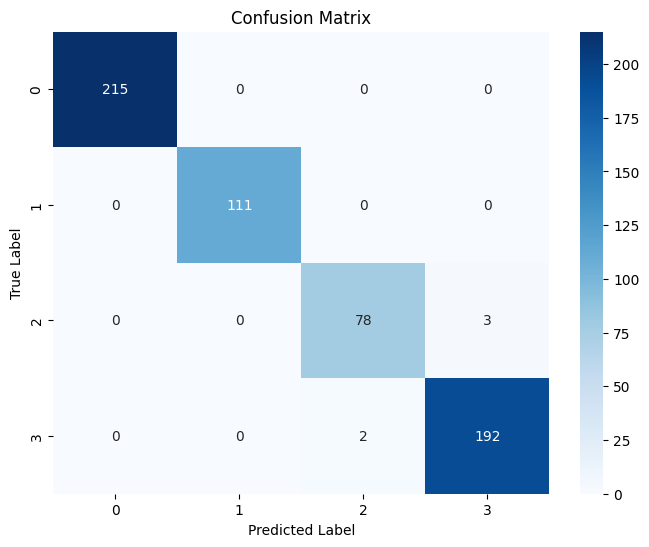

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()